In [1]:
import numpy as np
import pandas as pd
from pycaret.time_series import TSForecastingExperiment

In [2]:
train = pd.concat([pd.read_csv("data/train.csv"), pd.read_csv("data/train_new.csv")], axis=1)
test = pd.concat([pd.read_csv("data/test.csv"), pd.read_csv("data/test_new.csv")], axis=1)

In [3]:
train.set_index('time', inplace=True)
test.set_index('time', inplace=True)

In [4]:
challenge1 = TSForecastingExperiment()
challenge2 = TSForecastingExperiment()

In [5]:
challenge1.setup(
    train, target='Y1', ignore_features=['Y2'],
    numeric_imputation_exogenous='ffill', fh=16000,
    session_id=42,
)
challenge2.setup(
    train, target='Y2', ignore_features=['Y1'],
    numeric_imputation_exogenous='ffill', fh=16000,
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,Y1
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(80000, 17)"
5,Transformed data shape,"(80000, 17)"
6,Transformed train set shape,"(64000, 17)"
7,Transformed test set shape,"(16000, 17)"
8,Rows with missing values,96.0%
9,Fold Generator,ExpandingWindowSplitter


,Description,Value
0,session_id,42
1,Target,Y2
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(80000, 17)"
5,Transformed data shape,"(80000, 17)"
6,Transformed train set shape,"(64000, 17)"
7,Transformed test set shape,"(16000, 17)"
8,Rows with missing values,96.0%
9,Fold Generator,ExpandingWindowSplitter


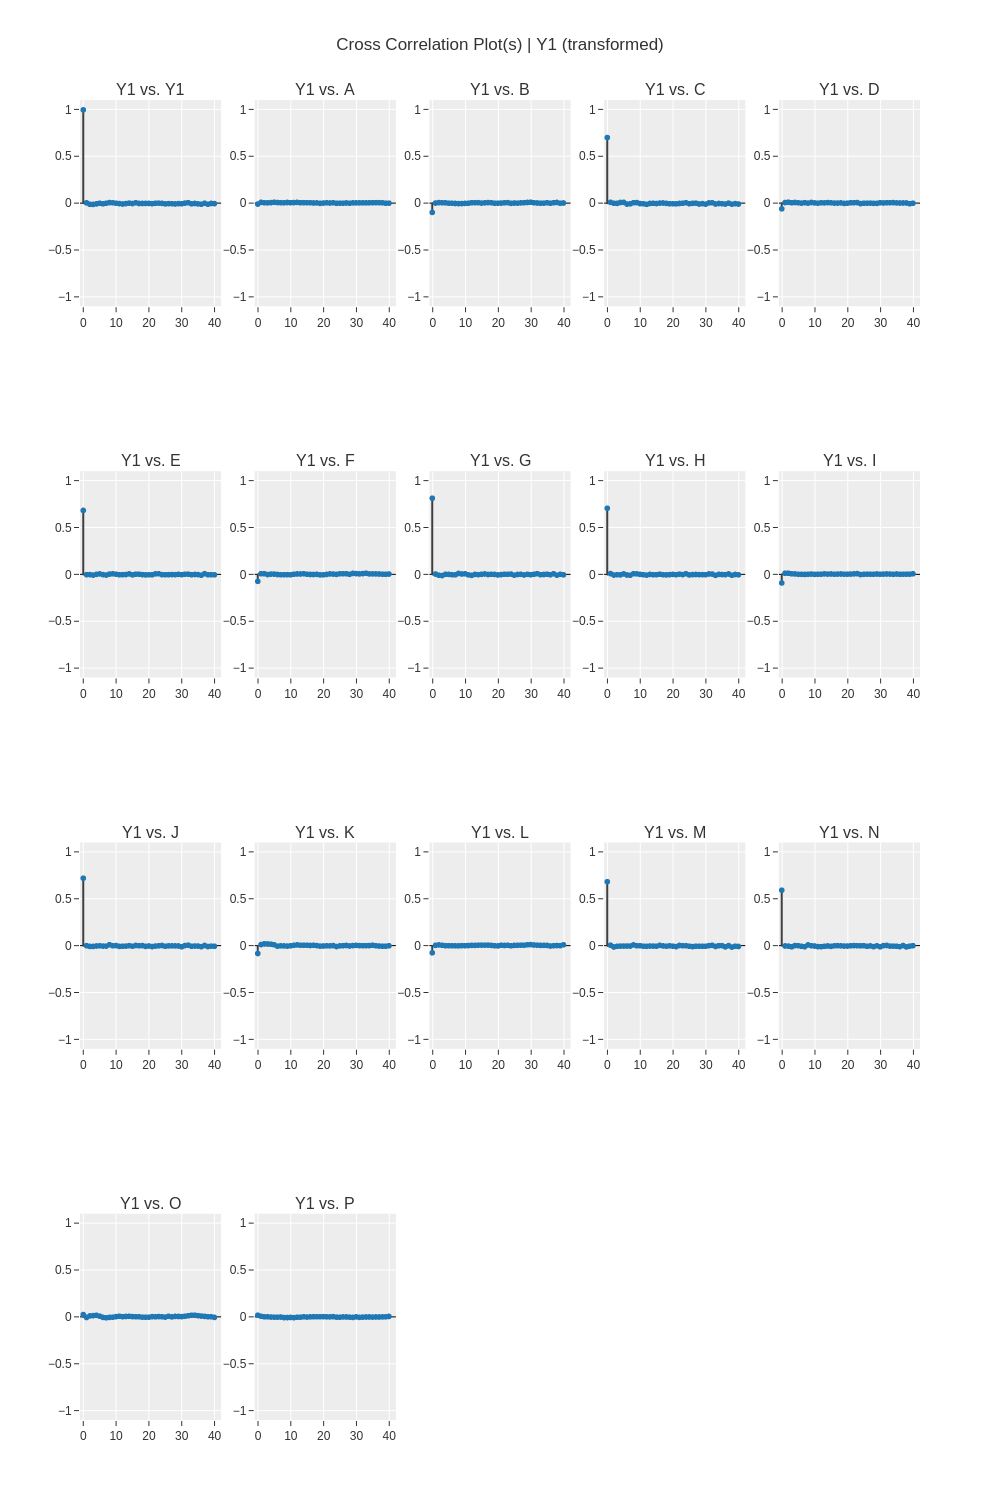

In [6]:
challenge1.plot_model(plot='ccf', fig_kwargs={"width": 1000, "height": 1500})

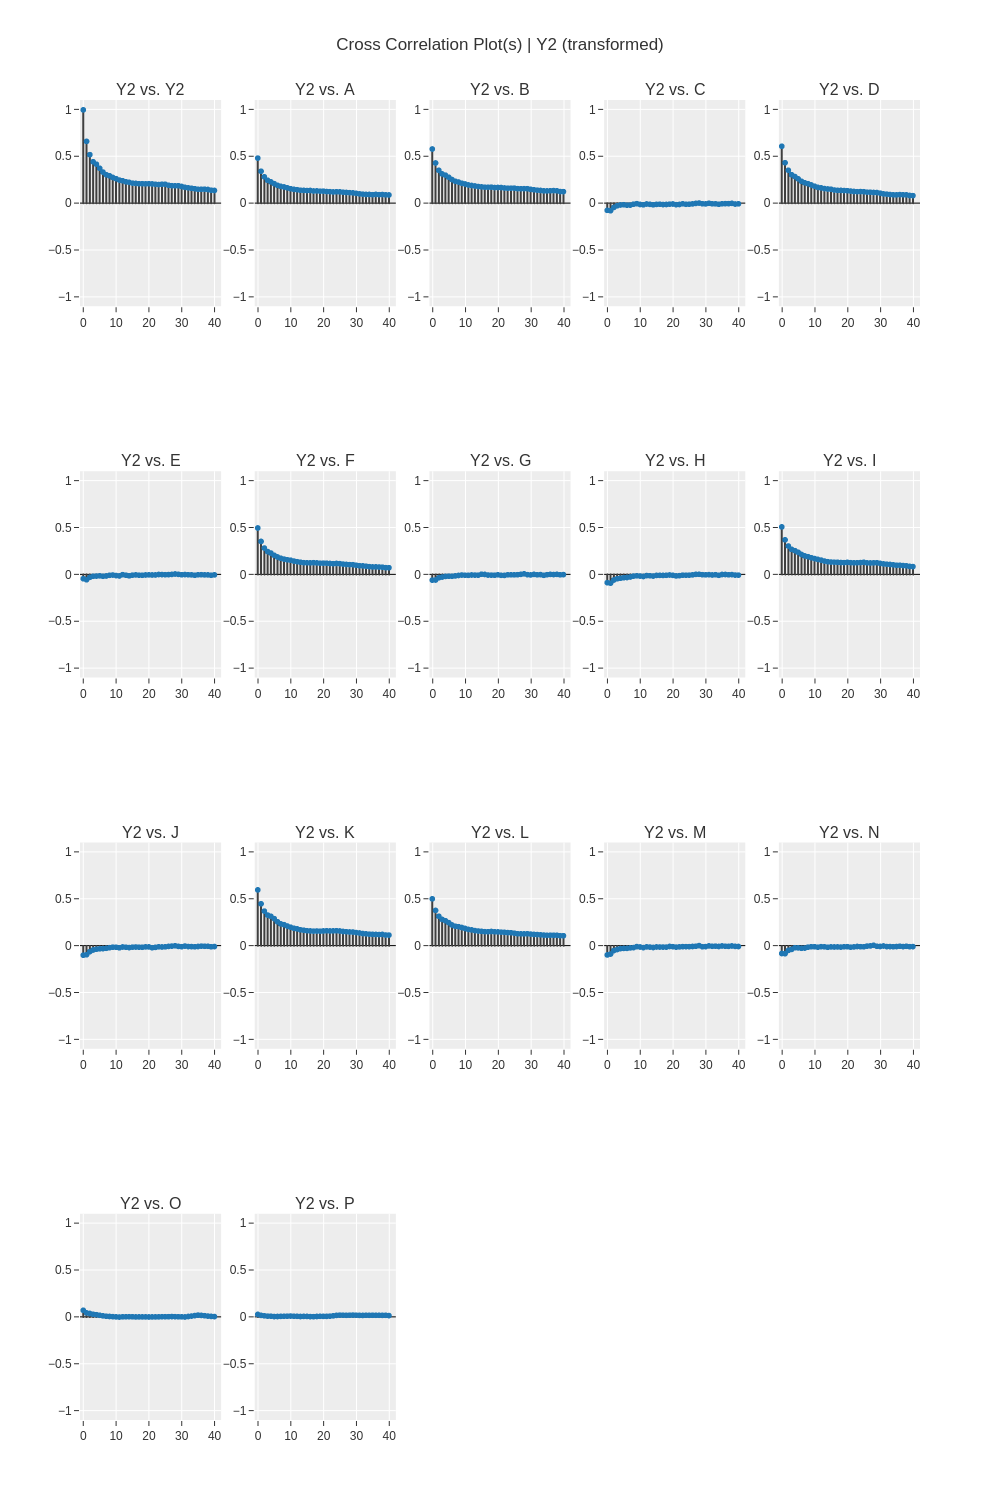

In [7]:
challenge2.plot_model(plot='ccf', fig_kwargs={"width": 1000, "height": 1500})

In [ ]:
best1 = challenge1.compare_models()
best2 = challenge2.compare_models()